# Assigmnet - 2

### Name: Gavin Furtado  Student No: 21200745  Module: Data Science in python

In this notebook a webiste is scarpped using beautiful soup 4 and the text obtained from it is used for binary and mutlicalss classification

### Task 1 -  Web Scarpping


In [108]:
import pandas as pd
import urllib.request
import bs4           # beautiful soup 4(html parser)

link = 'http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html'
response = urllib.request.urlopen(link)
html_script = response.read().decode()
soup_parser = bs4.BeautifulSoup(html_script, 'html.parser')

# Creating a list to store all the neccessary data from the html files
title = []
category = []
snippet_text = []

Three function have been made which are required for parsing and storing the desired information from a html text file

In [109]:
def monthlink(url_end):
    '''Creates the link for each month of the website'''
    url = f'http://mlg.ucd.ie/modules/COMP41680/assignment2/{url_end}'
    return url

def collect_data(soup_parser):
    '''Parses through the html file and extracts title, category and snippet'''
    for article in soup_parser.find_all('div',class_='article'):
            metadata = article.find_all('p',class_= 'metadata')
            categories = ['Books','Music','Film']

            for index in categories:
                if index in metadata[1].get_text():
                    category_ = metadata[1].get_text()
                    category_ = category_.split(':')[1].strip()
                    category.append(category_)
                    snippet_class = article.find('p',class_='snippet')
                    snippet_text.append(snippet_class.get_text())
                    title.append(article.h5.a.get_text())
                    #print(title)
                    #print(category)
                    #print(snippet_text)

def page(soup_parser):
    '''Updates the link to next page number'''
    pages = soup_parser.find('ul',class_='pagination')
    for li in pages.find_all('li'):
        #print(li.a['aria-label'])
        if li.a['aria-label'] == 'Next':
            if not li.a['href'] == '#':
                page_num = li.a['href']
                link = f'http://mlg.ucd.ie/modules/COMP41680/assignment2/{page_num}'
                #print(link)
                return link
            else:
                link = None
                #print(link)
                return link

This is the main part where all the html files are parsed and data is appended to a respective list. 

The selected categories are Books, Music and Film

In [110]:
# Getting links for all 12 months and storing it in a list 
url = []
for match in soup_parser.find_all('a'):
    text = match.get('href')
    if not text == 'index.html':
        url.append(monthlink(text))

# Pasring through every page of all 12 months
for u in url:
    link = u                                               # looping through each month eg.January then February and so on.
    while(link != None):                                   # Looping through all the available pages of that month.
        #print(link)
        response = urllib.request.urlopen(link)
        html_script = response.read().decode()
        soup_parser = bs4.BeautifulSoup(html_script, 'html.parser')       # Using bs4 to get html file
        collect_data(soup_parser)                          # this function will collect the required data and append to a list
        link = page(soup_parser)                           # updating the link to the link of the next page 
 

In [111]:
# Creating a dictionary
data = {'category':category,'title':title,'snippet':snippet_text}
# Converting dictionary to a dataframe
df = pd.DataFrame(data)  
# Verifying the dataframe
#df.head(10)
df.tail(10)

,category,title,snippet
5379,Music,'Audiences don't want white anger': how white ...,With Jack Harlow’s major label debut Thats Wha...
5380,Film,Let It Snow review – a seasonal chiller to war...,Summary: Nothing warms the anti-yuletide misan...
5381,Film,"The Dry review – Eric Bana stars in gripping, ...",Jane Harper’s best-selling novel The Dry is on...
5382,Books,Beginners by Tom Vanderbilt review – it's neve...,Most highly skilled fields have rude names for...
5383,Books,'Humaning': a nice idea or ridiculous corporat...,"In business news, Mondelēz International, a mu..."
5384,Music,Banging toons: why bands such as Bis are makin...,"An architect cranks a lever, and suddenly Mr S..."
5385,Books,Little Scratch by Rebecca Watson review - a da...,Rebecca Watson’s debut novel started life as a...
5386,Music,'All that mattered was survival': the songs th...,Isaac Hayes – Going in Circles When it came to...
5387,Film,‘It took its toll’: the terrible legacy of Mar...,"Summary: As a child in 1960s east Harlem, docu..."
5388,Music,"MF Doom, iconic masked hip-hop MC, dies aged 49","MF Doom, one of US hip-hop’s most distinctive ..."


In [112]:
### To check the full dataframe uncomment the lines below ###
#pd.set_option('display.max_rows', 5389)
#df

Now we have the data of three categories, so let us consider A = Books, B = Music, C = Film

### Task 2 - Binary Classification

In binary classification we only use two categories and train the data accordingly. We can make three combinations for binary classification whic are as follows, A and B (Books and Music), B and C (Music and Film), A and C (Books and Film)

Based on the combinations we filter out the data frame and store the data of the respective category combination.

In [113]:
with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_AB.txt','a', encoding="utf-8") as f:
    labels_AB = []
    for i in range(len(df)):
        row_category = df.loc[[i],'category']
        row_title = df.loc[[i],'title']
        row_snippet = df.loc[[i],'snippet']
        if row_category[i] == 'Books' or row_category[i] == 'Music':
            row = row_title[i] + ' ' + row_snippet[i]
            labels_AB.append(row_category[i] )
            f.writelines(row)
            f.writelines('\n')

Creating text file for category B and C (Music and Film)

In [114]:
with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_BC.txt','a', encoding="utf-8") as f:
    labels_BC = []
    for i in range(len(df)):
        row_category = df.loc[[i],'category']
        row_title = df.loc[[i],'title']
        row_snippet = df.loc[[i],'snippet']
        if row_category[i] == 'Music' or row_category[i] == 'Film':
            row = row_title[i] + ' ' + row_snippet[i]
            labels_BC.append(row_category[i] )
            f.writelines(row)
            f.writelines('\n')

Creating text file for category A and C (Books and Film)

In [115]:
with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_AC.txt','a', encoding="utf-8") as f:
    labels_AC = []
    for i in range(len(df)):
        row_category = df.loc[[i],'category']
        row_title = df.loc[[i],'title']
        row_snippet = df.loc[[i],'snippet']
        if row_category[i] == 'Books' or row_category[i] == 'Music':
            row = row_title[i] + ' ' + row_snippet[i]
            labels_AC.append(row_category[i] )
            f.writelines(row)
            f.writelines('\n')

Creating a text file with all the three categories

In [116]:
with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_ABC.txt','a', encoding="utf-8") as f:
    labels_ABC = []
    for i in range(len(df)):
        row_category = df.loc[[i],'category']
        row_title = df.loc[[i],'title']
        row_snippet = df.loc[[i],'snippet']
        row = row_title[i] + ' ' + row_snippet[i]
        labels_ABC.append(row_category[i] )
        f.writelines(row)
        f.writelines('\n')


Import everything neccessary

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
from sklearn.model_selection import train_test_split

Reading all the files

In [118]:
with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_AB.txt','r', encoding="utf-8") as f:
    fulldocument_AB = f.readlines()

with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_BC.txt','r', encoding="utf-8") as f:
    fulldocument_BC = f.readlines()

with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_AC.txt','r', encoding="utf-8") as f:
    fulldocument_AC = f.readlines()

with open(r'D:\Gavin\Academics\UCD\Ds in python\Assignment 2\fulldocument_ABC.txt','r', encoding="utf-8") as f:
    fulldocument_ABC = f.readlines()


In [119]:
### Taken from class jupyter notebooks ###

# import the WordNet lemmatizer
from nltk.stem import WordNetLemmatizer

def lemma_tokenizer(text):
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append(lemmatizer.lemmatize(token))
    return lemma_tokens

One of the steps for preprocessing the text is lemmatisation by using NLTK package.

For training model we have used linear support vector machine classifier 

In [120]:

def classification(document, labels):
    # Text Preprocessing using lemmantization, removing stop words, removing words low frequency words in documents
    vectorizer = TfidfVectorizer(stop_words="english", min_df = 5, tokenizer=lemma_tokenizer)
    # Vectorization
    X = vectorizer.fit_transform(document)
    # Splitting entire data into train and test data
    data_train, data_test, target_train, target_test = train_test_split(X, labels, test_size=0.2)
    # Calling a linear model
    model = SGDClassifier()
    # fit the training set to a model
    model.fit(data_train, target_train)
    print(f'Model used: {model}')
    # based on training predict the outcome of test data
    predicted = model.predict(data_test)
    #print(predicted)
    # Calculate accuracy
    acc = accuracy_score(target_test, predicted)
    print(f'Accuracy is {acc}')

    # confusion matrix
    cm = confusion_matrix(target_test, predicted)
    cmd = ConfusionMatrixDisplay(cm, display_labels=set(labels))
    cmd.plot();



Three combinations of binary classifications

D:\Gavin\Softwares\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Model used: SGDClassifier()
Accuracy is 0.9060773480662984


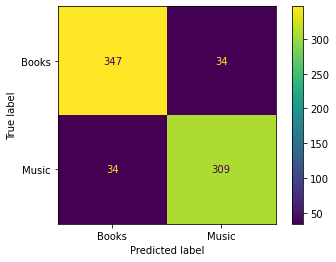

In [121]:
# Binary classification between books and music
classification(fulldocument_AB,labels_AB)

D:\Gavin\Softwares\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Model used: SGDClassifier()
Accuracy is 0.9159663865546218


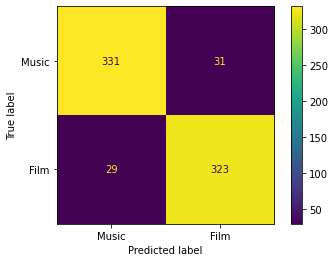

In [122]:
# binary classification between music and film
classification(fulldocument_BC,labels_BC)

D:\Gavin\Softwares\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Model used: SGDClassifier()
Accuracy is 0.9074585635359116


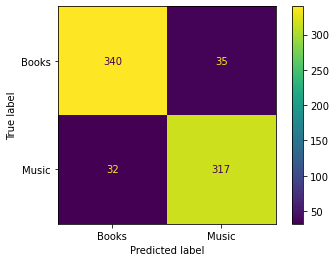

In [125]:
# binary classification between books and film
classification(fulldocument_AC,labels_AC)

The confusion matrices of binary classification show high values for true positive and true negative elements, hence the model works correctly.

### Task 3 - Multiclass classification

For multiclass classification we can used the same function classification but we need to give a document which contains all the three categories.

D:\Gavin\Softwares\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Model used: SGDClassifier()
Accuracy is 0.8812615955473099


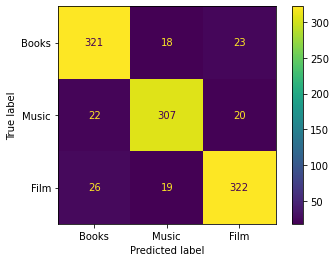

In [126]:
# multiclass class classification using all three categories
classification(fulldocument_ABC,labels_ABC)

The confusion matrices of binary classification show high values for true positive and true negative across the diagonal elements, hence the model works correctly. It has a accuracy of 88% 

We can try using other models to get different accuracies depending on the type of data.
Shown below is an example of linear Logistic Regression model which returns higher accuracy.

D:\Gavin\Softwares\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Model used: LogisticRegression()
Accuracy is 0.8636363636363636


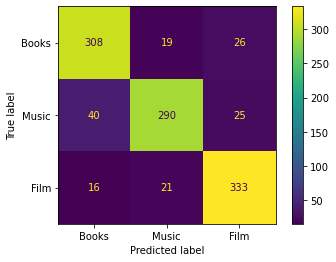

In [127]:
from sklearn.linear_model import LogisticRegression
def lr_model(document, labels):
    # Text Preprocessing using lemmantization, removing stop words, removing words low frequency words in documents
    vectorizer = TfidfVectorizer(stop_words="english", min_df = 5, tokenizer=lemma_tokenizer)
    X = vectorizer.fit_transform(document)


    data_train, data_test, target_train, target_test = train_test_split(X, labels, test_size=0.2)
    model = LogisticRegression()
    model.fit(data_train, target_train)
    print(f'Model used: {model}')
    predicted = model.predict(data_test)
    #print(predicted)
    acc = accuracy_score(target_test, predicted)
    print(f'Accuracy is {acc}')

    # calculate the confusion matrix
    cm = confusion_matrix(target_test, predicted)
    # display it graphically
    cmd = ConfusionMatrixDisplay(cm, display_labels=set(labels))
    cmd.plot();

lr_model(fulldocument_ABC, labels_ABC)